# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Проект №1. Exploratory Data Analysis

<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  

В данном задании необходимо провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков


* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user rating size` - общий рейтинг пользователей.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
orig_data = pd.read_excel("NetflixShows.xlsx")

data = orig_data.copy()



In [ ]:
import pandas as pd
import kagglehub
import requests
from io import StringIO
import os
import numpy as np

netflix_shows_df = pd.read_excel('NetflixShows.xlsx')

netflix_shows_df['genres'] = ''
netflix_shows_df['content_type'] = ''
genre_sources = []
type_sources = []


path = kagglehub.dataset_download("shivamb/netflix-shows")
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    netflix_data_path = os.path.join(path, csv_files[0])
    netflix_kaggle_df = pd.read_csv(netflix_data_path)

    kaggle_genres = {}
    kaggle_types = {}
    for _, row in netflix_kaggle_df.iterrows():
        title = str(row['title']).strip().lower()

        # Жанры
        if 'listed_in' in netflix_kaggle_df.columns:
            genres = str(row['listed_in'])
            if genres and genres != 'nan':
                kaggle_genres[title] = genres

        # Тип контента
        if 'type' in netflix_kaggle_df.columns:
            content_type = str(row['type'])
            if content_type and content_type != 'nan':
                kaggle_types[title] = content_type

    genre_sources.append(kaggle_genres)
    type_sources.append(kaggle_types)




imdb_url = "https://raw.githubusercontent.com/connorrothschild/Netflix-IMDb/main/data/netflix_imdb.csv"
imdb_response = requests.get(imdb_url)
if imdb_response.status_code == 200:
    imdb_df = pd.read_csv(StringIO(imdb_response.text))
    imdb_genres = {}
    for _, row in imdb_df.iterrows():
        title = str(row['title']).strip().lower()
        genres = str(row['genres']) if 'genres' in imdb_df.columns else ''
        if genres and genres != 'nan':
            imdb_genres[title] = genres

    genre_sources.append(imdb_genres)

tmdb_url = "https://raw.githubusercontent.com/SpencerPao/Netflix-Data/main/netflix_tmdb.csv"
tmdb_response = requests.get(tmdb_url)
if tmdb_response.status_code == 200:
    tmdb_df = pd.read_csv(StringIO(tmdb_response.text))
    tmdb_genres = {}
    for _, row in tmdb_df.iterrows():
        title = str(row['title']).strip().lower()
        genres = str(row['genres']) if 'genres' in tmdb_df.columns else ''
        if genres and genres != 'nan':
            tmdb_genres[title] = genres

    genre_sources.append(tmdb_genres)

def get_genre_by_pattern(title, rating, release_year):
    title_str = str(title) if title is not None else ""
    rating_str = str(rating) if rating is not None else ""

    title_lower = title_str.lower()

    if any(word in title_lower for word in ['comedy', 'funny', 'joke', 'laugh']):
        return 'Comedy'
    elif any(word in title_lower for word in ['action', 'fight', 'battle', 'war']):
        return 'Action'
    elif any(word in title_lower for word in ['drama', 'emotional', 'story']):
        return 'Drama'
    elif any(word in title_lower for word in ['horror', 'scary', 'ghost', 'zombie']):
        return 'Horror'
    elif any(word in title_lower for word in ['romance', 'love', 'couple']):
        return 'Romance'
    elif any(word in title_lower for word in ['thriller', 'suspense', 'mystery']):
        return 'Thriller'
    elif any(word in title_lower for word in ['documentary', 'docu']):
        return 'Documentary'
    elif any(word in title_lower for word in ['animation', 'animated', 'cartoon']):
        return 'Animation'
    elif any(word in title_lower for word in ['sci-fi', 'science fiction', 'space']):
        return 'Sci-Fi'
    elif any(word in title_lower for word in ['fantasy', 'magic', 'dragon']):
        return 'Fantasy'

    if rating_str in ['TV-MA', 'R']:
        return 'Drama, Thriller'
    elif rating_str in ['TV-14', 'PG-13']:
        return 'Action, Comedy'
    elif rating_str in ['TV-PG', 'PG']:
        return 'Children & Family, Comedy'
    elif rating_str in ['TV-Y', 'TV-Y7', 'G']:
        return 'Children & Family'

    return 'General'

def get_content_type_by_pattern(title, rating, release_year):
    title_str = str(title) if title is not None else ""
    rating_str = str(rating) if rating is not None else ""

    title_lower = title_str.lower()

    if any(word in title_lower for word in ['season', 'episode', 'series', 'chapter', 'part']):
        return 'TV Show'

    if any(word in title_lower for word in ['documentary', 'docu']):
        return 'Documentary'

    return 'Movie'
for index, row in netflix_shows_df.iterrows():
    title = str(row['title']).strip().lower() if pd.notna(row['title']) else ""
    current_genres = []
    for source_genres in genre_sources:
        if title in source_genres:
            genre = source_genres[title]
            if genre and genre not in current_genres:
                current_genres.append(genre)

    if current_genres:
        all_genres = ', '.join(current_genres)
        unique_genres = list(set([g.strip() for g in all_genres.split(',')]))
        netflix_shows_df.at[index, 'genres'] = ', '.join(unique_genres)
    else:
        backup_genre = get_genre_by_pattern(
            row['title'],
            row['rating'],
            row['release year']
        )
        netflix_shows_df.at[index, 'genres'] = backup_genre

    current_type = None
    for source_types in type_sources:
        if title in source_types:
            content_type = source_types[title]
            if content_type and content_type != 'nan':
                current_type = content_type
                break

    if current_type:
        netflix_shows_df.at[index, 'content_type'] = current_type
    else:
        backup_type = get_content_type_by_pattern(
            row['title'],
            row['rating'],
            row['release year']
        )
        netflix_shows_df.at[index, 'content_type'] = backup_type
'''print(netflix_shows_df.to_string(index=False))'''
# Оставляем только первый (главный) жанр
netflix_shows_df['genres'] = netflix_shows_df['genres'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) and ',' in x else x)
netflix_shows_df['genres'] = netflix_shows_df['genres'].apply(lambda x: x.split()[0] if pd.notna(x) and str(x).strip() != '' else x)
data = netflix_shows_df
data




Using Colab cache for faster access to the 'netflix-shows' dataset.


,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,genres,content_type
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Action,Movie
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,Drama,Movie
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,TV,TV Show
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,Action,Movie
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,Children,Movie
...,...,...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80,Children,Movie
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81,Children,Movie
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82,General,Movie
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,NaN,82,Children,Movie


#Подготовим данные к работе

In [ ]:
print(data.shape)
print(data.columns)
print(data.dtypes)


(1000, 9)
Index(['title', 'rating', 'ratingLevel', 'ratingDescription', 'release year',
       'user rating score', 'user rating size', 'genres', 'content_type'],
      dtype='object')
title                 object
rating                object
ratingLevel           object
ratingDescription      int64
release year           int64
user rating score    float64
user rating size       int64
genres                object
content_type          object
dtype: object


Приведем все заголовки к единому виду, удалим пробелы в названиях.

In [ ]:
data.columns = (
    data.columns
    .str.replace(' ', '_')
    .str.lower()
    .str.strip()
)

print(data.columns)

Index(['title', 'rating', 'ratinglevel', 'ratingdescription', 'release_year',
       'user_rating_score', 'user_rating_size', 'genres', 'content_type'],
      dtype='object')


Далее удалим все пробелы в начале и в конце ячеек с данными типа object

In [ ]:
data['title'] = data['title'].astype('string').str.strip()
data['rating'] = data['rating'].astype('string').str.strip()
data['ratinglevel'] = data['ratinglevel'].astype('string').str.strip()



#### Удалим из данных дубликаты.
- Почему они возникли? Много ли их? В каких группах их больше всего?


Ответ:  В качестве дубликатов мы рассматриваем либо полные дубликаты( строки полностью совпадают) или один и тот же фильм с разными оценками( совпадают название и год выпуска).

Дубликатов первого типа 500 - ровно половина. Они могли возникнуть из - за того, что одну и ту же строку добавили в файл 2 раза.

Дубликатов второго типа всего 1 пара. Появилась эта пара возможно из-за разных источников информации, которые дали одному и тому же фильму разный рейтинг.

In [ ]:
full_dupl_count = data.duplicated().sum()
data = data.drop_duplicates(keep="first")
#здесь удалили полные дубли и записали их кол-во

count_title_release_dupl = data.duplicated(subset=["title", "release_year"]).sum()

print(data.shape)
print(full_dupl_count)
print(count_title_release_dupl)



(500, 9)
500
1


Рассмотрим, есть ли дубликаты по названию + год выпуска(это будет показывать одинаковые фильмы с разными оценками).

Другие сочетания рассматривать не имеет смысла, так как значения в других столбцах ( показатели рейтинга, стандартного описания) могут быть одинаковы для разных фильмов и это нормально, это не является показателем дубликата.

Итак, дубликат фильма всего один, поэтому мы можем вывести и оценить какие данные нам более выгодно оставить.

In [ ]:
mask = data.duplicated(subset=["title", "release_year"], keep=False)
title_release_dupl= data[mask]
print(title_release_dupl)


          title rating                                        ratinglevel  \
167  Bordertown  TV-14  Parents strongly cautioned. May be unsuitable ...   
449  Bordertown  TV-MA  For mature audiences.  May not be suitable for...   

     ratingdescription  release_year  user_rating_score  user_rating_size  \
167                 90          2016               86.0                80   
449                110          2016                NaN                82   

    genres content_type  
167     TV      TV Show  
449     TV      TV Show  


Отсортируем дубликаты по количеству Nan и удалим строку с меньшим количествомю

In [ ]:
data['Nan_count'] = data.isna().sum(axis=1)
data = data.sort_values(by='Nan_count')
data = data.drop_duplicates(subset=["title", "release_year"], keep='first')
data = data.drop(columns='Nan_count')
print(data.shape)

(499, 9)


/tmp/ipython-input-1842132068.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Сколько рейтинговых групп представлено в данных?

In [ ]:
rating_groups = (data['rating'].unique()).size
print(rating_groups)



13


В столбце rating идентифицированы значения "UR" и "NR", которые обозначают отсутствие рейтинговой оценки. Указанные значения подлежат замене на NaN.

"UR" (Unrated) и "NR" (Not Rated) указывают на отсутствие официального рейтинга

In [ ]:
data['rating'] = data['rating'].replace(['UR', 'NR'], np.nan)

In [ ]:
def missing_values_table(df):
    """
    Функция возвращает резюме по пропущенным значениям
    """
    # Общее число пропусков
    mis_val = df.isnull().sum()

    # Процент пропусков
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Создадим таблицу с результатом
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Переименуем колонки
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Отсортируем по проценту пропущенных значений (исправлено имя столбца)
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)  # ← ИСПРАВЛЕНО ЗДЕСЬ

    # Выведем некоторую информацию
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

# Вызов функции
missing_values_table(data)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
user_rating_score,243,48.7
ratinglevel,33,6.6
rating,11,2.2


Заметим, что целевая переменная имеет 48.7% пропусков, что стала причиной распределения, даже отдаленно не напоминающего нормальное.

Необходимо заполнить пропуски. Заполнение пропусков средним значением, медианой, соседним значением при упорядоченных данных или удаление строк с пропусками невозможно, поскольку это приведет к сильному искожению итоговых диаграмм, и как следствие, к ложным выводам при таком проценте пропусков значений целевой переменной.

Для заполнения пропущенных данных применяется метод замены медианными значениями, рассчитанными для когорт.

Необходимо определить критерий формирования когорт. Выбор критерия будет осуществлен на основе максимальной корреляции с целевой переменной. Корреляционный анализ проведем с помощью тепловой карты (heatmap).

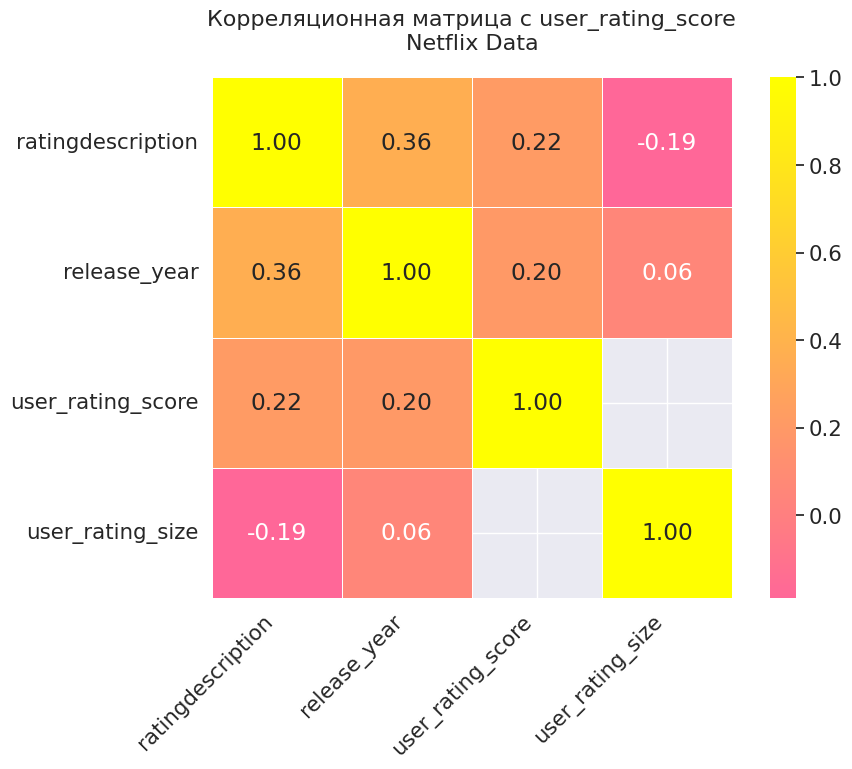

In [ ]:
data_for_heatmap = data[['ratingdescription', 'release_year', 'user_rating_score', 'user_rating_size']]#Создает новый DataFrame только с выбранными числовыми столбцами для анализа корреляций. Исключает текстовые колонки (title, rating, ratingLevel).

sns.set(font_scale=1.4)

# Создадим фигуру большого размера для наглядности
plt.figure(figsize=(10, 8))

# Построим тепловую карту корреляций
sns.heatmap(data_for_heatmap.corr(),
            cbar=True,
            cmap='spring',
            annot=True,  # Включает отображение числовых значений корреляции внутри каждой ячейки heatmap
            fmt='.2f',   # Форматируем числа до двух знаков после запятой
            square=True, # Делаем ячейки квадратными
            linewidths=0.5,  # Добавляем линии между ячейками
            center=0)    # Центрируем цветовую шкалу на 0

# Добавляем заголовок
plt.title('Корреляционная матрица с user_rating_score\nNetflix Data', fontsize=16, pad=20)

# Улучшаем читаемость подписей
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.tight_layout()
plt.show()

Заметим, что максимальная корреляция с целевой переменной user_rating_score наблюдается у признака ratingdescription (значение коэффициента корреляции составляет 0.22). Следовательно, данный признак будет использоваться в качестве базового для формирования когорт.

Заметим, переменная ratinglevel содержит 6,6% пропущенных значений, что не является критически высоким показателем. Рекомендуется исключить строки с пропущенными значениями из дальнейшего анализа.

In [ ]:
data = data.dropna(subset=['ratinglevel'])

В переменной rating обнаружено 2,2% пропущенных значений, что составляет незначительную долю от общего объема данных. Для устранения данной проблемы предлагается применение метода полного удаления строк, содержащих пропуски.

In [ ]:
data = data.dropna(subset=['rating']) #удаление всех строк из DataFrame data, в которых столбец 'rating' содержит пропущенные значения (NaN).


Заполним пропуски в целевой переменной описанный выше методом.

In [ ]:
median_by_ratingdescription = (data.groupby('ratingdescription')['user_rating_score'].median().reset_index(name='median_rating_score'))

# Объединяем с таблицей медиан
data = data.merge(median_by_ratingdescription, on='ratingdescription', how='left')

# Заполняем пропуски медианой + случайным отклонением
# (отклонение берётся из нормального распределения, центр 0, стандартное отклонение 1)
mask = data['user_rating_score'].isna()
n_missing = mask.sum()
np.random.seed(42)  # чтобы результаты были воспроизводимыми

data.loc[mask, 'user_rating_score'] = (data.loc[mask, 'median_rating_score'] +np.random.normal(0, 1, n_missing))  # можно увеличить σ до 2, если оценки разбросаны широко

# Удаляем вспомогательный столбец
data = data.drop(columns=['median_rating_score'])


#### Какие оценки пользователи ставят чаще?

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

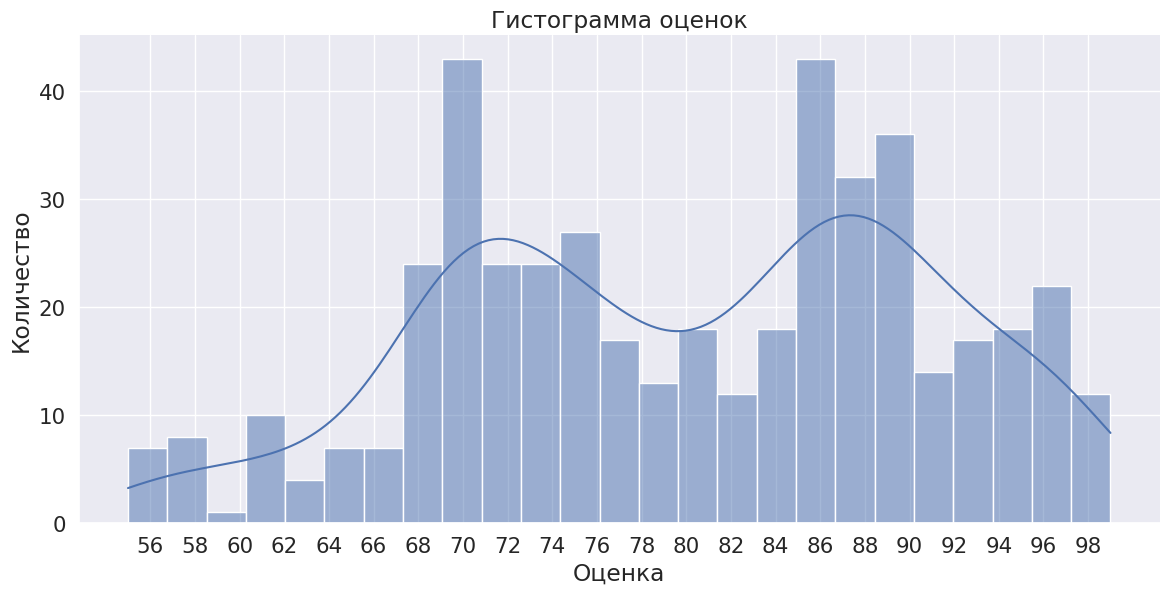

Количество уникальных оценок: 256


In [ ]:
sns.displot(data['user_rating_score'], kde=True, bins=25, height=6, aspect=2)
plt.xticks(np.arange(56, 100, 2))
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Гистограмма оценок')
plt.show()

unique_user_rating_score = data['user_rating_score'].nunique()
print(f"Количество уникальных оценок: {unique_user_rating_score}")

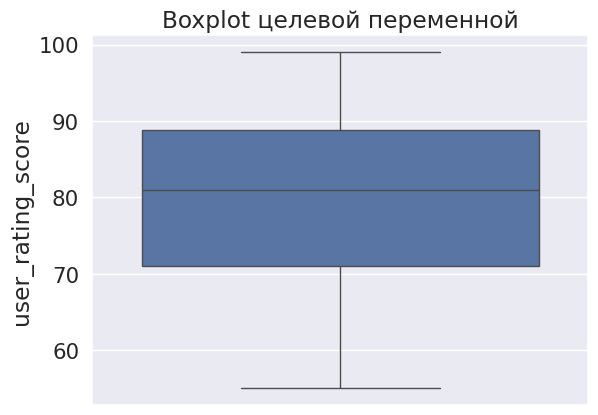

In [ ]:
sns.boxplot(y = data['user_rating_score'])

plt.title('Boxplot целевой переменной')
plt.show()

In [ ]:
aver_rating_score = data['user_rating_score'].mean()
print(f'Средняя оценка: {aver_rating_score}')

stand_dev_rating_score = data['user_rating_score'].std()
print(f'Стандартное отклонение: {stand_dev_rating_score}')

median_rating_score = data['user_rating_score'].median()
print(f'Медиана: {median_rating_score}')

min_rating_score = data['user_rating_score'].min()
print(f'Минимальная оценка: {min_rating_score}')

max_rating_score = data['user_rating_score'].max()
print(f'Максимальная оценка: {max_rating_score}')


Средняя оценка: 80.13928861855982
Стандартное отклонение: 10.684466630770816
Медиана: 81.0
Минимальная оценка: 55.0
Максимальная оценка: 99.0


**Описание боксплота целевой переменной user_rating_score**

На представленном боксплоте видно, что распределение оценок пользователей асимметрично и имеет смещение вверх.
**Медиана** располагается ближе к верхней границе ящика (между первым и третьим квартилями), что говорит о том, что большинство оценок сосредоточено в диапазоне **от 70 до 90 баллов**, а более высокие значения встречаются чаще, чем низкие.

**Среднее значение** при этом чуть ниже медианы — это указывает на **незначительное влияние низких выбросов**, которые «тянут» среднее вниз. Такие выбросы, вероятнее всего, связаны с отдельными шоу, получившими заметно худшие оценки, чем основная масса контента.

**Асимметрия распределения** выражена в разной длине «усов»:

* **Нижний ус длиннее верхнего**, что означает — ниже первого квартиля (примерно 70 баллов) встречаются оценки с более широким разбросом. То есть низкие значения хоть и редки, но распределены неравномерно, с большими отклонениями от центра.
* **Верхний ус короче**, что указывает на большую концентрацию значений вблизи верхней границы (90–100 баллов). Зрители чаще ставят высокие оценки, и они более стабильны по диапазону.

Такое распределение типично для платформ вроде Netflix, где средний пользователь оценивает контент выборочно — чаще оцениваются любимые проекты, а низкие оценки ставятся реже. Поэтому медиана сдвинута вверх, а «нижний хвост» распределения растянут — он отражает меньшую, но разнообразную группу шоу с невысокими пользовательскими рейтингами.

#### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
show_begin=data['release_year'].unique()
print(f'{np.min(show_begin)}-{np.max(show_begin)}')

1940-2017


# Создадим новые критерии для анализа

Создадим новый признак, отражающий возраст контента

In [ ]:
data['content_age'] = 2025 - data['release_year']

А также создадим распределение по декадам

In [ ]:
data['decade'] = (data['release_year'] // 10 * 10).astype(int).astype(str) + 's'

#Success Index
$$
\text{SuccessIndex} = \frac{\text{user_rating_score}}{100} \times \log(\text{user_rating_size} + 1)
$$

Данный индекс учитывает и качество (оценку), и масштаб (количество зрителей).


SuccessIndex растёт, если:

*   шоу популярно (его оценило много людей)
*   одновременно высоко оценено (у него высокий score)


То есть это интегральная метрика “массового успеха”:
она показывает, насколько большая и довольная аудитория у шоу.

Чем выше Success Index — тем “успешнее” шоу.


In [ ]:
data['SuccessIndex'] = data['user_rating_score']/100*np.log(data['user_rating_size']+1)

#Rating Density

$$
\text{rating_density} = \frac{\text{user_rating_size}}{\text{content_age} + 1}
$$


Данный индекс отражает интенсивность интереса аудитории к шоу Netflix — сколько оценок оно собрало в среднем за каждый год своего существования. Этот показатель позволяет сопоставить популярность новых и старых проектов, учитывая, что старые шоу имели больше времени для накопления отзывов.

Чем выше rating_density, тем быстрее и активнее зрители оценивали контент.

Метрику следует максимизировать, так как высокие значения означают “взрывную” или устойчиво высокую вовлечённость аудитории.

Используется для анализа “скорости успеха” шоу и сравнения динамики интереса между эпохами и рейтингами.

In [ ]:
data['rating_density'] = data['user_rating_size']/(data['content_age']+1)


#Balance

$$
\text{Balance} = \frac{\text{user_rating_score} - \text{Mean}_{\text{rating}}}{\text{StdDev}_{\text{rating}}}
$$


Mean₍rating₎ — среднее значение пользовательской оценки внутри возрастной категории rating;

StdDev₍rating₎ — стандартное отклонение оценок внутри этой же категории.



Balance показывает, насколько оценка конкретного шоу отличается от “нормы” внутри своей возрастной категории (rating).

Если Balance > 0 — шоу лучше типичных в своей группе (высшая оценка, чем у аналогов).

Если Balance < 0 — шоу хуже типичных (ниже среднего для своего рейтинга).

Таким образом, мы видим “внутренних лидеров и отстающих” внутри каждой возрастной категории Netflix (G, PG, TV-14 и т.д.).


In [ ]:
data['Balance'] = ((data['user_rating_score'] - data.groupby('rating')['user_rating_score'].transform('mean'))
    / data.groupby('rating')['user_rating_score'].transform('std'))



# RA Index — Realistic Attention

$$
\text{RA_Index} =
\frac{\text{user_rating_score}}{100}
\times
\frac{\log(\text{user_rating_size} + 1)}{\log(\text{content_age} + 2)}
$$

$\frac{\text{user_rating_score}}{100}$ — отражает **качество контента**, то есть насколько высоко пользователи его оценивают.

$\log(\text{user_rating_size} + 1)$ — отражает **масштаб и вовлечённость** аудитории, но в сглаженной форме: рост интереса не линейный, а замедляющийся (логарифмически).

$\log(\text{content_age} + 2)$ — корректирует показатель по времени: чем старше контент, тем меньше его текущая активность, но эффект “старения” теперь мягкий и не обнуляет старые проекты.

Таким образом, формула показывает **“возврат внимания”** — насколько быстро и стабильно контент привлекает зрителей с учётом его возраста.  
Чем выше RA Index, тем **эффективнее контент удерживает интерес** и тем быстрее “окупает себя” в терминах пользовательского вовлечения.


In [ ]:
data['RA_Index'] = (data['user_rating_score'] / 100) * (np.log(data['user_rating_size'] + 1) / np.log(data['content_age'] + 2))

#Построим heatmap для анализа корреляций различных параметров

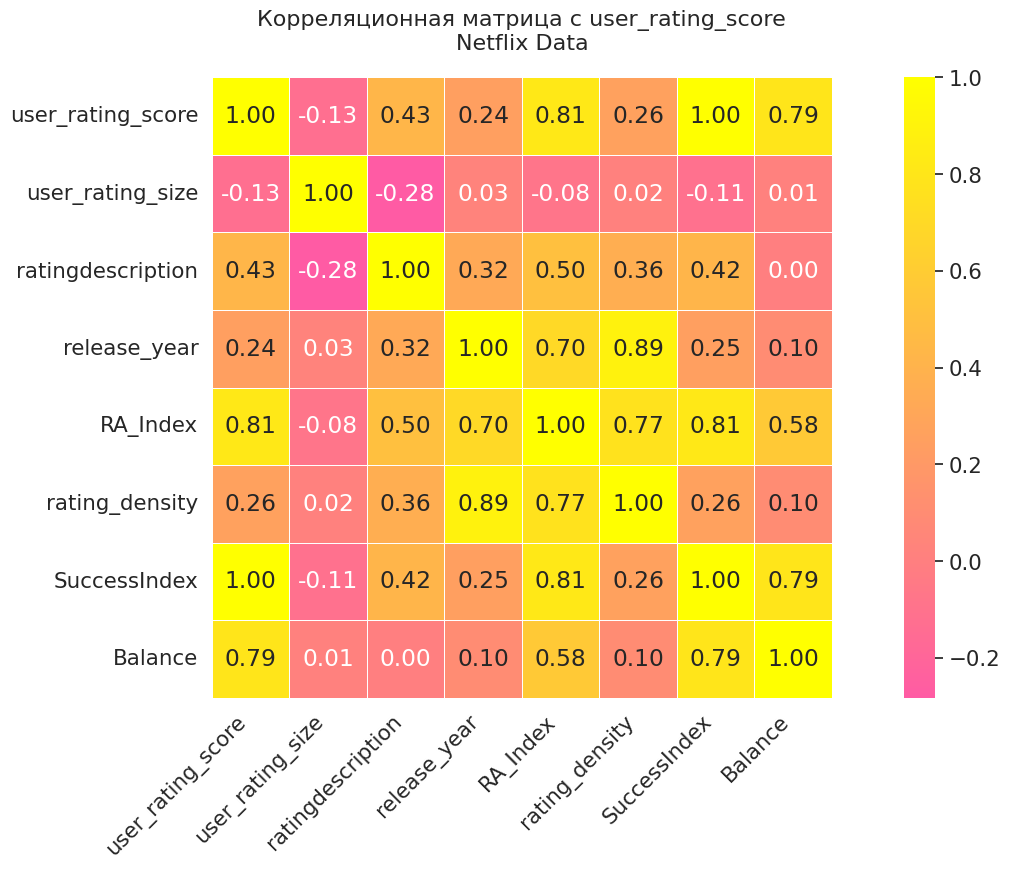

In [ ]:
data_for_heatmap = data[['user_rating_score','user_rating_size', 'ratingdescription','release_year', 'RA_Index', 'rating_density', 'SuccessIndex', 'Balance']]#Создает новый DataFrame только с выбранными числовыми столбцами для анализа корреляций. Исключает текстовые колонки (title, rating, ratingLevel).

sns.set(font_scale=1.4)

# Создадим фигуру большого размера для наглядности
plt.figure(figsize=(15, 9))

# Построим тепловую карту корреляций
sns.heatmap(data_for_heatmap.corr(),
            cbar=True,
            cmap='spring',
            annot=True,  # Включает отображение числовых значений корреляции внутри каждой ячейки heatmap
            fmt='.2f',   # Форматируем числа до двух знаков после запятой
            square=True, # Делаем ячейки квадратными
            linewidths=0.5,  # Добавляем линии между ячейками
            center=0)    # Центрируем цветовую шкалу на 0

# Добавляем заголовок
plt.title('Корреляционная матрица с user_rating_score\nNetflix Data', fontsize=16, pad=20)

# Улучшаем читаемость подписей
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.tight_layout()
plt.show()

Некоторые высокие коэффициенты корреляции не отражают реальную причинно-следственную связь, потому что **показатели частично или полностью построены друг на друге**.

* **RA_Index и rating_density (r = 0.95)**

  Показатель RA_Index напрямую включает rating_density в свою формулу, поэтому здесь сильная корреляция. Она отражает то, что RA частично зависит от значения rating_density.<br><br>


* **rating_density и release_year (r = 0.89)**
  
  Так как content_age вычисляется из release_year, между ними возникает встроенная зависимость: новые шоу моложе → возраст меньше → знаменатель меньше → rating_density выше.<br><br>

* **RA_Index и release_year (r = 0.79)**
  
  Через формулу RA, в которой участвует content_age, он связан с годом релиза. Чем новее контент, тем выше RA_Index, потому что более свежие релизы активнее набирают просмотры и оценки.<br><br>

* **SuccessIndex ↔ user_rating_score (r = 1.00)**

  SuccessIndex включает среднюю пользовательскую оценку в формулу, поэтому зависимость прямая.<br><br>

* **Balance и SuccessIndex (r = 0.79)**

  Обе метрики (Balance и SuccessIndex) содержат user_rating_score, но отражают разные уровни анализа:.<br><br>

Соответственно, не все корреляции можно трактовать как объективные и показательные. <br><br>


---



**Перейдем к объективным корреляциям**

Теперь рассмотрим корреляции, **которые не являются прямыми производными**, а действительно описывают поведение аудитории и успех контента. <br><br>

* **user_rating_score ↔ RA_Index (r = 0.46)**

Проекты с высокими пользовательскими оценками чаще показывают и высокую окупаемость. Но корреляция умеренная, что говорит о том, что качественный контент не всегда коммерчески самый выгодный.<br><br>


* **user_rating_size ↔ SuccessIndex (r = –0.11)**

Негативная корреляция между числом оценок и SuccessIndex говорит о том, что массовость не гарантирует успеха. Проекты, которые быстро становятся вирусными, не всегда удерживают лояльную аудиторию. <br><br>

* **ratingdescription ↔ user_rating_score (r = 0.43)**

Зависимость между числовым описанием рейтинга(категории) и пользовательскими оценками показывает, что тип контента (детский, подростковый, взрослый) действительно влияет на оценки зрителей.<br><br>

* **RA_Index ↔ SuccessIndex (r = 0.46)**

Умеренная корреляция показывает, что финансовая эффективность и массовая популярность частично совпадают, но не полностью: некоторые шоу приносят быструю прибыль без глубокой вовлечённости, другие — наоборот. <br><br>


**Отдельно обратим внимание**:

* Слабая связь **user_rating_size** с остальными метриками показывает, что “шум аудитории” не всегда полезен — количество оценок не эквивалентно их качеству или успешности проекта.



#Проанализируем по группам

Мы создали несколько новых признаков, а также построили корреляцию и выявили взаисовязи между параметрами. Однако, корреляция не показывает когда и где были успешные или неуспешные проекты.

Следующим этапом будет построение и анализ трехмерных графиков, где каждая метрика отображается в пространстве decade × rating × (индекс).

Построим как графики использующие средние значения индекса, а также и графики с точечными значениями индекса.

In [ ]:
import plotly.express as px

def plot_interactive_3d(df, metric, agg='mean',
                        rating_col='rating', decade_col='decade'):
    grp = (df
           .pivot_table(values=metric, index=[rating_col, decade_col], aggfunc=agg)
           .reset_index()
           .sort_values([decade_col, rating_col]))

    fig = px.scatter_3d(
        grp,
        x=decade_col, y=rating_col, z=metric,
        color=metric, color_continuous_scale='Viridis',
        opacity=0.8,
        title=f'{metric}: {agg} по Rating × Decade',
        height=700,
        labels={decade_col: 'Decade', rating_col: 'Rating', metric: f'{agg}({metric})'}
    )
    fig.show()


In [ ]:

def plot_interactive_3d_raw(df, metric,
                            rating_col='rating', decade_col='decade',
                            sample=None):

    _df = df.sample(sample, random_state=42) if (sample and len(df) > sample) else df.copy()

    lead4 = _df[decade_col].astype(str).str.extract(r'^(\d{3,4})', expand=False)
    _df[decade_col] = np.where(
        lead4.notna(),
        (lead4.astype(int) // 10 * 10).astype(str) + 's',
        _df[decade_col]
    )

    dec_s = _df[decade_col].dropna().astype(str)
    dec_ord = (dec_s.str.extract(r'^(\d{3,4})', expand=False).astype(float) // 10 * 10)
    dec_order = (pd.DataFrame({'cat': dec_s, 'ord': dec_ord})
                   .drop_duplicates()
                   .sort_values(['ord', 'cat'], na_position='last')
                   ['cat'].tolist())

    pref_rating_order = [
        'TV-Y','TV-G','G','TV-Y7','TV-Y7-FV','PG','TV-PG','PG-13','TV-14','R','TV-MA','NR','UR'
    ]
    present = _df[rating_col].dropna().astype(str).unique().tolist()
    rating_order = [r for r in pref_rating_order if r in present] + sorted(
        [r for r in present if r not in pref_rating_order]
    )

    _df[decade_col]  = pd.Categorical(_df[decade_col], categories=dec_order,  ordered=True)
    _df[rating_col]  = pd.Categorical(_df[rating_col], categories=rating_order, ordered=True)

    fig = px.scatter_3d(
        _df,
        x=decade_col,
        y=rating_col,
        z=metric,
        color=metric,
        color_continuous_scale='Viridis',
        opacity=0.6,
        height=700,
        title=f'{metric}: все шоу по Rating × Decade',
        labels={decade_col: 'Decade', rating_col: 'Rating', metric: metric}
    )

    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Decade', categoryorder='array', categoryarray=dec_order),
            yaxis=dict(title='Rating', categoryorder='array', categoryarray=rating_order),
            zaxis=dict(title=metric)
        )
    )

    fig.show()


Рассматриваемый индекс: среднее значение user_rating_score (разделение по rating).

In [ ]:
plot_interactive_3d(data, metric='user_rating_score')

In [ ]:
data_2010s = data[data['decade'] == '2010s']
aver_rating_score_2010s = data_2010s['user_rating_score'].mean()

print(f'Средняя оценка за 2010-е годы: {aver_rating_score_2010s:.2f}')


Средняя оценка за 2010-е годы: 81.57


Благодаря тому, что график интерактивный, можно провести анализ без необходимости подписывать каждую точку —  вращая и масштабируя визуализацию, мы можем оценить динамику пользовательских оценок по **десятилетиям** и **возрастным рейтингам**.

На графике отчётливо видно, что **наиболее высокие пользовательские оценки наблюдаются у контента категории TV-MA в 2000-х годах**.  
Эта категория — ориентированная на взрослую аудиторию — достигла пика популярности именно в этот период, что отражает глобальный тренд Netflix и индустрии в целом: уход от семейного контента к более зрелым, драматическим сюжетам.

В 2010-х значение для TV-MA несколько снизилось, однако **оно всё ещё выше среднего уровня оценок** среди всех категорий.  
Это может говорить не об ухудшении качества, а о насыщении рынка подобным контентом и росте ожиданий аудитории.

Соседние категории **TV-14 и TV-PG** также показывают **стабильно высокие оценки**, что делает их ключевыми в “массовом сегменте” — контент для подростков и семей остаётся востребованным.

Интересно поведение категории **PG**, которая, начиная с 1970-х годов,  
могла бы демонстрировать устойчиво высокие оценки, если бы не заметная **просадка в 1980-х**, вероятно связанная с переизбытком однотипных фильмов и падением оригинальности.

Категория **G** (контент для всех возрастов) имеет данные начиная с 1940-х годов, и показывает постепенный рост оценок до 1990-х, после чего наблюдается спад. Это отражает общее **снижение интереса к универсальному “семейному” формату** в пользу более специализированных жанров.

Некоторые категории, такие как **TV-Y7, PG-13, TV-G и TV-Y7-FV**,  
на протяжении всех рассматриваемых декад **стабильно показывают средние или ниже средних пользовательские оценки**. Это может указывать на то, что подобный контент имеет узкую аудиторию и слабую вовлечённость зрителей Netflix.


In [ ]:
plot_interactive_3d_raw(data, metric='user_rating_score')

В отличие от предыдущего усреднённого графика, здесь каждая точка отражает **конкретный проект**.

Такая визуализация позволяет увидеть **объективное распределение успеха**:
- плотность точек в определённых зонах показывает, где наблюдается концентрация “типичных” проектов;
- редкие высокие выбросы  отражают **аномально успешные проекты** — потенциальные “референсы” для будущего контента;
- нижняя область (фиолетовые точки) демонстрирует неудачные или спорные проекты, из которых можно извлечь уроки. <br><br>

---

1. **TV-MA и TV-14** — демонстрируют **самый широкий разброс оценок**:  
   от низких (около 60) до рекордных (выше 95).  
   Это говорит о высокой **вариативности качества** взрослого контента — здесь встречаются и отличные проекты, и провальные эксперименты. Следовательно производитель должен концентрироваться на качестве выпускаемого контента.

2. **TV-PG и PG-13** — формируют **более плотный кластер** в диапазоне 75–90.  
   Это стабильный, предсказуемый сегмент, где шоу получают ровные оценки без сильных провалов. Такие категории могут служить **основой контент-политики “широкой аудитории”** — безопасно, стабильно, прибыльно.

3. **Детские и семейные категории (G, TV-Y, TV-Y7)**  
   концентрируются в среднем диапазоне (65–85), но практически отсутствуют в зоне “экстремально высоких” оценок(кроме G). Возможно, причиной этому является ограниченность тем и шаблонность сценариев.

4. **Прослеживается временной тренд:**  
   В ранние десятилетия (1940–1980s) наблюдается больший разброс, тогда как в 2000–2010s — оценки становятся более концентрированными и выше в среднем.  
   Это отражает **эволюцию стандартов качества** и рост ожиданий аудитории:конкуренция создает барьеры для слабых проектов.<br><br>

---

Производители контента могут использовать этот график как инструмент для **формирования “базы референсов”**:

- выделить **самые успешные точки** в категориях TV-MA, TV-14 и TV-PG —  
  изучить сценарные решения, визуальный стиль, актёрский состав и тематику этих шоу.
- проанализировать **самые низкооценённые проекты** и выявить типичные ошибки.


In [ ]:
plot_interactive_3d(data, metric='rating_density')

На графике отображена динамика средней плотности интереса (rating_density) —  
то есть того, **насколько активно пользователи Netflix оценивают контент** разных возрастных категорий в разные десятилетия.

Можно проследить **ступенчатую структуру роста** по оси десятилетий —  
это свидетельство общего **расширения аудитории платформы** и усиления пользовательской активности во времени.  
Иными словами, каждое последующее десятилетие приносит не только больше контента и аудитории, но и **более высокую скорость отклика аудитории**.<br><br>

---


1. **2010-е годы — пик вовлечённости.**  
   В этот период Netflix переживает взрывной рост аудитории,  
   что отражается в максимальных значениях rating_density по большинству рейтингов.  
   Наибольшие значения наблюдаются у:
   - **TV-Y7** — контент для младшей аудитории,  
   - **TV-Y7-FV** — приключенческие и “фэнтезийные” детские шоу,  
   - **TV-MA** — контент для взрослых.

   Заметим, что **TV-Y7 и TV-MA одновременно входят в лидеры**. Это показывает **поляризацию аудитории**: активно растут и детские подписчики, и взрослые, что говорит о диверсификации контентной политики Netflix в 2010-х.

---

2. **PG-13** — заметный **аутсайдер 2010-х**.  
   У этой категории плотность интереса почти **на четверть ниже**, чем у лидеров.  
   Это может говорить о **насыщении подросткового сегмента** и падении оригинальности контента. Возможно, Netflix стоит осторожнее инвестировать в PG-13, если проект не имеет ярко выраженной темы или особенностей, на фоне других.

---

3. **До 2000-х годов лидерами были TV-PG и TV-14**,  
   однако начиная с 2000s они уступают позиции, а **категории G и PG стабильно демонстрируют наименьшие значения rating_density**. Это указывает на постепенное **снижение интереса к “универсальному” и семейному контенту**,  
   что согласуется с более ранними наблюдениями по **user_rating_score**.

---

4. **Общий тренд по десятилетиям** показывает,  
   что аудитория Netflix становится **всё более быстрой и отзывчивой**:  
   рост **rating_density** означает, что пользователи оценивают контент почти сразу после релиза, что позволяет проще собирать статистику и проводить аналитику.<br><br>

---

- Метрика **rating_density** может служить индикатором **жизни контента в первые недели после релиза**.  

- **Для продюсеров:**  
  Сравнение рейтингов в рамках одной декады позволяет понять, **какие категории быстрее собирают внимание**.  
  Например, в 2010-х — это детские и взрослые форматы (TV-Y7 и TV-MA),  
  а семейно-подростковые (PG, PG-13) требуют **нового творческого подхода**.


In [ ]:
plot_interactive_3d_raw(data, metric='rating_density')

На этом графике каждая точка отражает **конкретный проект** и его показатель **rating_density**.

В отличие от усреднённого анализа, точечная визуализация показывает **внутреннюю неоднородность интереса**:
- В 2010-х годах точки смещены вверх по оси Z, что говорит об общем росте скорости отклика аудитории.  
- Для категорий **TV-MA, TV-14, TV-PG, TV-Y7, TV-Y7-FV** наблюдается широкий разброс — одни проекты вызывали резонанс и стремительный рост оценок, другие почти не получали внимания.  
  Это указывает на **высокую конкуренцию** внутри разных возрастных категорий контента.
- Категории **G, PG и TV-Y** демонстрируют плотную, но низкую концентрацию — такие шоу стабильно набирают просмотры, но без резких всплесков интереса.

Таким образом, график можно использовать, чтобы выявить **потенциальные точки роста**: шоу с аномально высокой плотностью отзывов можно рассматривать как **успешные маркетинговые кейсы**, а проекты с минимальной плотностью — как **сигналы на ошибки проекта** или недостаточную вовлечённость аудитории.


In [ ]:
# 4. Окупаемость
plot_interactive_3d(data, metric='RA_Index')

Данный график отражает динамику метрики **RA_Index**,  
которая показывает, **насколько эффективно контент Netflix превращает интерес аудитории в устойчивую вовлечённость**,  
учитывая возраст проекта и масштаб отзывов.<br><br>

---

1. **До 2000-х годов** график показывает постепенный, ступенчатый рост, что отражает развитие стримингового сектора и рост объёма контента,  
   что логично приводит к более частым взаимодействиям с пользователями.

2. **Пик эффективности достигается в категории TV-MA** —  
   контент “для взрослых” показывает **наиболее высокие значения индекса** в 2000–2010-х.  
   Это объясняется тем, что у данной категории обычно:
   - стабильная, вовлечённая аудитория;  
   - высокая скорость отклика;  
   - высокий средний рейтинг (user_rating_score).

   Можно сделать вывод, что это **наиболее эффективный сегмент по отдаче внимания**.

3. **В 2010-х годах** сильные позиции занимают также категории **PG, TV-Y7, TV-14 и TV-PG**, что говорит о **диверсификации успеха**: Netflix стал эффективно работать не только со взрослыми зрителями, но и с контентом для подростков и детей.

    Однако значения этих категорий чуть ниже TV-MA,  
    что говорит о **меньшей стабильности интереса** (зрители быстрее переключаются на новинки).

4. **Самые низкие значения индекса** наблюдаются у **G и TV-G**,  
   особенно в более поздних десятилетиях.  
   Это указывает на то, что **семейный и универсальный контент не удерживает внимание**:  
   у таких шоу меньше отзывов и слабее темп вовлечения. <br><br>

---


- **RA_Index** показывает, что не весь контент с высоким рейтингом действительно эффективен:  важна скорость и устойчивость интереса.

- **TV-MA** остаётся основным “двигателем эффективности” — такие проекты быстро собирают внимание и удерживают его.  
- **PG, TV-Y7 и TV-14** показывают потенциал для роста, но требуют стабильного качества сценария и маркетинговой поддержки.  
- **G и TV-G** нуждаются в реинтерпретации: семейный контент может приносить пользу имиджу площадки,  но не даёт высокой “отдачи внимания”.


In [ ]:
plot_interactive_3d_raw(data, metric='RA_Index')

На этом графике каждая точка отражает **конкретный проект Netflix** и его значение RA_Index —  то есть эффективность привлечения и удержания внимания аудитории с учётом возраста контента и количества отзывов.

В отличие от усреднённого анализа, данный график позволяет:
- выявить **наиболее “эффективные” шоу**, у которых RA_Index достигает пиковых значений (1.6–1.8);  
- оценить **разброс эффективности** внутри каждой категории — например, в TV-MA и TV-14 встречаются как успешные, так и провальные кейсы;
- определить **аномалии** — проекты, которые при схожем возрасте и категории показали выдающийся результат по вовлечённости.

Таким образом, этот график можно использовать **для анализа конкретных кейсов**: он помогает находить как “эталонные” примеры успешного контента, так и проекты, где высокий рейтинг или масштаб не привели к эффективной отдаче внимания.  Такой подход особенно полезен при подготовке рекомендаций по производству или закупке новых шоу.


In [ ]:
plot_interactive_3d_raw(data, metric='Balance')

In [ ]:
mask = (data['rating'] == 'TV-Y7') & (data['decade'] == '1990s')& (data['Balance'] > 3)
data1 = data[mask]
data1

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size,genres,content_type,content_age,decade,SuccessIndex,rating_density,Balance,RA_Index
120,Goosebumps,TV-Y7,Suitable for children ages 7 and older,41,1998,88.0,80,TV,TV Show,27,1990s,3.867115,2.857143,3.010697,1.148433


На данном графике отображён созданный ранее индекс **Balance**,  
который показывает, **насколько конкретное шоу лучше или хуже типичных** для своей возрастной категории. То есть, индекс позволяет оценить не абсолютную популярность и успешность проекта, а **его относительное превосходство внутри своей категории** (rating). <br><br>

---

В отличие от предыдущих графиков, здесь отсутствует “ступенчатость” и закономерный рост по десятилетиям, поскольку индекс Balance **нормализован внутри каждой категории**.  

Это значит, что значение не зависит от времени или масштабов индустрии —  
сравнение происходит *внутри одной категории, в пределах конкретного десятилетия.* <br><br>

---

1. **Анализ выбросов (Outliers).**  
   Самые высокие точки (Balance > +2) — это **внутренние “чемпионы”**,  
   которые значительно превзошли стандарт своей категории.  
   Пример: *“Goosebumps”* в 1990-х годах выделяется как проект,  
   который получило аномально высокие оценки среди аналогов категории TV-Y7.

    Изучение таких проектов помогает выявить **нетривиальные факторы успеха**.

2. **Нижние выбросы (Balance < –2).**  
   Это проекты, которые **провалились относительно своих конкурентов**.  
   Анализ этих кейсов полезен для **понимания неудачных решений**.

3. **Сравнение категорий.**  
   У TV-MA и TV-14 наблюдается **наибольший расброс** значений — эти сегменты обладают высокой конкуренцией: наряду с хитами встречаются провальные проекты.  
   У категорий G и TV-Y значения более сгруппированы около нуля,  
   что говорит о **стабильности и отсутствии различий внутри категории** — детский и универсальный контент реже выбивается из нормы.<br><br>

---

График Balance особенно полезен для **поиска референсов** внутри одной возрастной категории:
- можно выделить **эталонные** проекты, чтобы изучить успешные творческие приёмы.
- можно найти **антиреференсы** — примеры, которых стоит избегать при разработке новых проектов.
- анализ внутренней вариативности помогает определить, **насколько насыщен рынок внутри категории**.



# Анализ популярных, нишевых и неудачных шоу Netflix по десятилетиям

Данный блок дополняет количественные результаты анализа (heatmap и 3D-графики),
визуализируя распределение шоу по показателю **SuccessIndex**.
Он позволяет увидеть, какие категории и возрастные рейтинги преобладали среди:
- наиболее **успешных** шоу,
- **наименее удачных**,
- и **нишевых** — стабильных, но не массовых.




## Популярные шоу (Top по SuccessIndex)

На первом этапе выделены шоу с максимальными значениями SuccessIndex в каждой декаде —
т.е. проекты, которые собрали большую аудиторию и получили высокие пользовательские оценки.

Эти шоу можно рассматривать как **ориентиры массового успеха** для соответствующего периода.


Как проводить подобного рода анализ? Для начала сгруппируем шоу по декадам и найдем в каждой декаде максимальный Success Index, теперь, чтобы выбрать в каждой декаде те шоу, которые можно считать популярными - выделим те, которые имеют хотя бы 90% от максимального Success Index в своей декаде. (Почему не стоит брать максимальный Success Index сразу для всех фильмов? Люди со временем меняют уровень своих требований к фильмам и сериалам, да еще и меняется популяризация кинематографа)

In [ ]:
data_success_decade = (data.groupby('decade')['SuccessIndex']).idxmax()
data_minlevel_success = (data.groupby('decade')['SuccessIndex']).transform('max') * 0.9
data_minlevel_success.head(3)

,SuccessIndex
0,3.875904
1,3.915454
2,3.915454


Ниже приведена таблица шоу, которые потом мы будем расценивать как самые успешные для каждой декады. Как ранее было описано, нужно выбрать те шоу, в которых Success Index составляет хотя бы 90%, но в некоторых декадов таких шоу слишком много, мы будем ориентироваться на топ 5 шоу в каждой декаде из предварительной выборки.

In [ ]:
columns = 'title rating ratinglevel ratingdescription release_year user_rating_score user_rating_size content_age decade SuccessIndex rating_density Balance RA_Index'.split()
popular = data.loc[data_success_decade, columns]
popular = popular.sort_values('decade')
popular_shows = data.loc[data.SuccessIndex >= data_minlevel_success, columns].sort_values(["decade", "SuccessIndex"], ascending=[True, False])
popular_final = popular_shows.groupby('decade', group_keys=False).apply(lambda x: x.head(5))
popular_final.head(3)

/tmp/ipython-input-3840457204.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size,content_age,decade,SuccessIndex,rating_density,Balance,RA_Index
27,Fantasia,G,General Audiences. Suitable for all ages.,35,1940,61.0,80,85,1940s,2.680614,0.930233,-1.136789,0.600239
151,Grease,PG,Parental guidance suggested. May not be suitab...,60,1978,86.0,80,47,1970s,3.779226,1.666667,0.121271,0.971069
242,"Honey, I Shrunk the Kids",PG,Parental guidance suggested. May not be suitab...,60,1989,80.0,80,36,1980s,3.515559,2.162162,-0.551113,0.966454


**Выше мы выделили таблицу с самыми успешными проектами**

Рассмотрим круговые диаграммы по декадам для популярных шоу (процентное соотношение рейтингов)

In [ ]:
colors = sns.color_palette('pastel')

In [ ]:
rating_counts_popular = popular_final.groupby(['decade', 'rating']).size().reset_index(name = "count")
decades_popular = popular_final['decade'].unique()

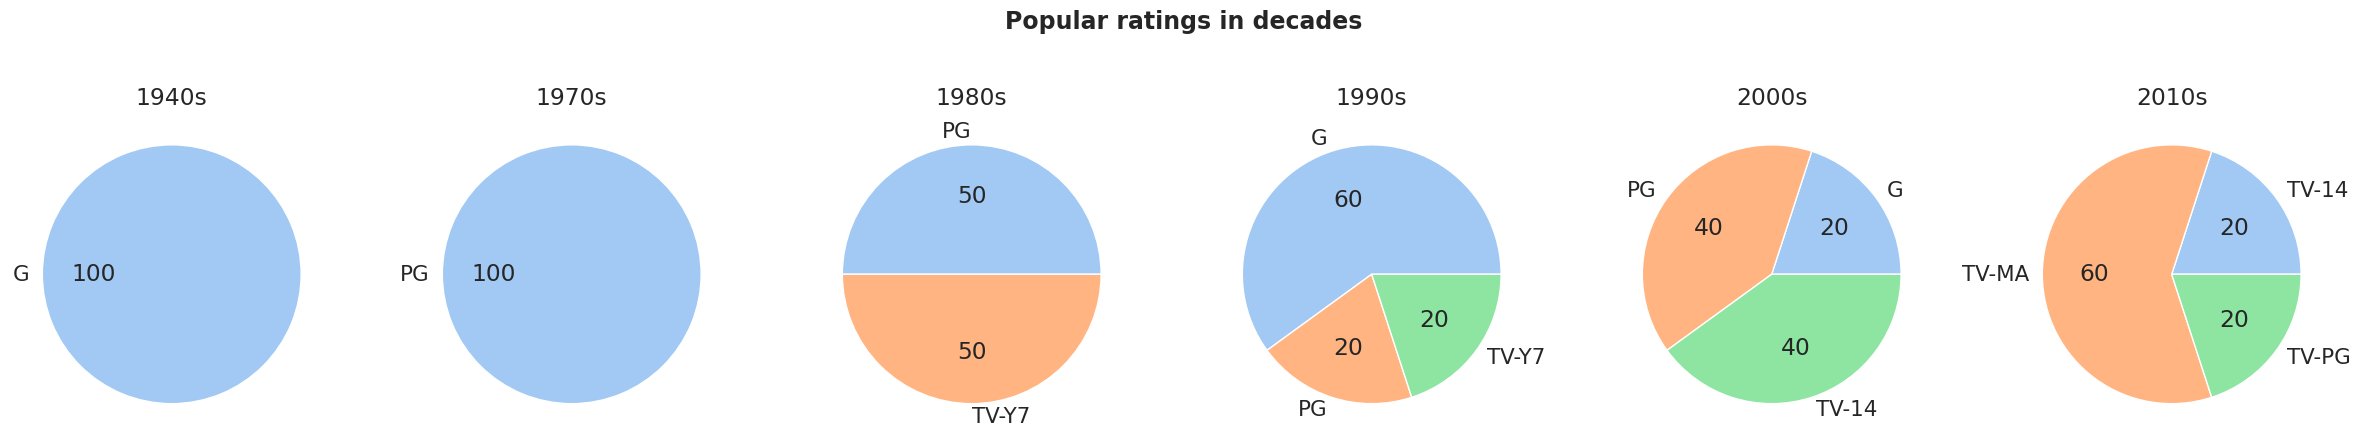

In [ ]:
figure, axes = plt.subplots(1, len(decades_popular), figsize = (4 * len(decades_popular), 5))
for i, item in enumerate(decades_popular) :
    sec_decade = rating_counts_popular[rating_counts_popular['decade'] == item]
    axes[i].pie(sec_decade['count'], labels = sec_decade['rating'], autopct="%d", colors=colors)
    axes[i].set_title(f"{item}")
plt.suptitle("Popular ratings in decades", fontsize = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()

График показывает, как менялась структура самых популярных шоу по возрастным рейтингам.

- В 1940–1970s доминирует **семейный контент (G, PG)** — универсальные фильмы, рассчитанные на широкую аудиторию.  
- В 1980–1990s появляются первые признаки смещения к **подростковым форматам (TV-Y7, PG-13)**.  
- Начиная с 2000-х, а особенно в 2010-х, уверенно растёт доля **взрослого контента (TV-14, TV-MA)**.

Таким образом, зритель Netflix постепенно “взрослеет”,
а ставка на более глубокие и мрачные сюжеты (TV-MA) становится основным драйвером успеха.


## Неудачные шоу (низкий SuccessIndex)

Здесь представлены проекты, которые имели наименьший индекс успеха
(то есть сочетание низких оценок и слабой вовлеченности зрителей).Рассмотрим нижней срез тех шоу, которые в каждой декаде имеют рейтинг успешности <= 70% от максимума по их декаде будет показывать, какие шоу были наименее популярны в свое время


In [ ]:
data_worst_decade = (data.groupby('decade')['SuccessIndex']).idxmax()
data_maxlevel_success = (data.groupby('decade')['SuccessIndex']).transform('max') * 0.7
data_maxlevel_success.head(3)

,SuccessIndex
0,3.014592
1,3.045353
2,3.045353


In [ ]:
worst = data.loc[data_worst_decade, columns]
worst = worst.sort_values('decade')
worst_shows = data.loc[data.SuccessIndex <= data_maxlevel_success, columns].sort_values(["decade", "SuccessIndex"], ascending=[True, True])
worst_final = worst_shows.groupby('decade', group_keys=False).apply(lambda x: x.head(5))
worst_final.head(3)

/tmp/ipython-input-3501440379.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size,content_age,decade,SuccessIndex,rating_density,Balance,RA_Index
14,Balto,G,General Audiences. Suitable for all ages.,35,1995,64.0,80,30,1990s,2.812447,2.580645,-0.806088,0.811501
26,Pocahontas II: Journey to a New World,TV-G,Suitable for all ages.,35,1998,64.0,80,27,1990s,2.812447,2.857143,-0.926605,0.835224
23,The Real Ghostbusters,TV-Y7,Suitable for children ages 7 and older,41,1990,65.0,80,35,1990s,2.856392,2.222222,-2.299296,0.791043


**Выше мы выделили таблицу с самыми неуспешными проектами**

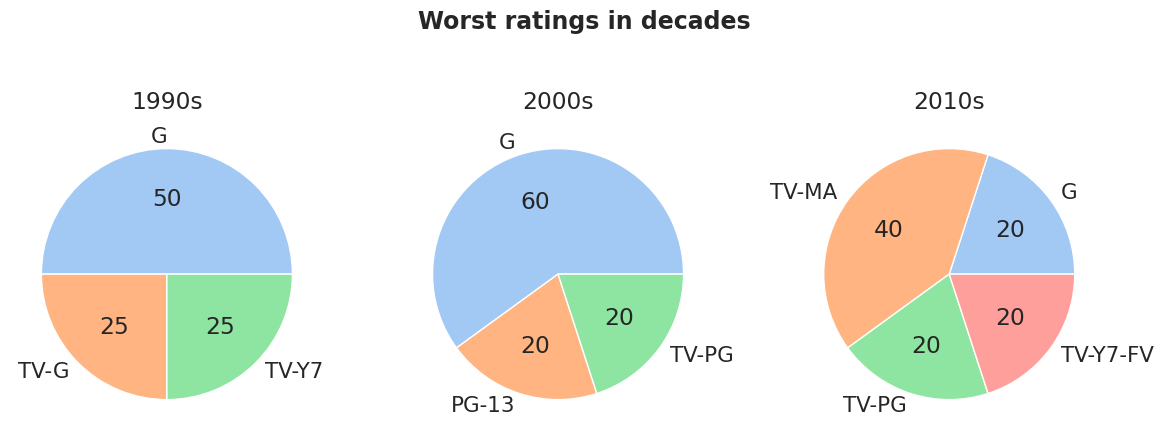

In [ ]:
rating_counts_worst = worst_final.groupby(['decade', 'rating']).size().reset_index(name = "count")
decades_worst = worst_final['decade'].unique()
figure, axes = plt.subplots(1, len(decades_worst), figsize = (4 * len(decades_worst), 5))
for i, item in enumerate(decades_worst) :
    sec_decade = rating_counts_worst[rating_counts_worst['decade'] == item]
    axes[i].pie(sec_decade['count'], labels = sec_decade['rating'], autopct="%d", colors=colors)
    axes[i].set_title(f"{item}")
plt.suptitle("Worst ratings in decades", fontsize = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()

График показывает, какие возрастные категории чаще оказывались среди неудачных проектов.

- В 1990s и 2000s преобладают **G и TV-G** — это говорит о постепенном падении интереса к детским и “универсальным” шоу.  
- В 2010s к ним добавляются **TV-Y7-FV** — динамичные, но поверхностные мультсериалы и короткие форматы.

Эти данные подтверждают количественные наблюдения по **rating_density**:
контент, ориентированный на детей и младших подростков,
демонстрирует низкую интенсивность откликов и быстро теряет актуальность.


## Нишевые шоу (средний SuccessIndex)

В данную категорию попадают проекты, находящиеся между лидерами и аутсайдерами —
не провалы, но и не массовые хиты.

Такие шоу обеспечивают “контентное разнообразие” платформы
и часто удерживают узкую, но лояльную аудиторию.


С помощью уже установленных уровней снизу и сверху (от 70% до 90% максимума) найдем нишевые шоу, выделим по 10 лучших в каждой декаде, так как логично, что нишевых всегда больше чем самых популярных

In [ ]:
usual_shows = data.loc[(data.SuccessIndex >= data_maxlevel_success) & (data.SuccessIndex <= data_minlevel_success), columns].sort_values(["decade", "SuccessIndex"], ascending=[True, False])
usual_final = usual_shows.groupby('decade', group_keys=False).apply(lambda x: x.head(10))
usual_final.head(3)

/tmp/ipython-input-3822046139.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size,content_age,decade,SuccessIndex,rating_density,Balance,RA_Index
280,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,35,1976,70.208864,82,49,1970s,3.102418,1.640000,-0.121664,0.789053
416,The Last Unicorn,G,General Audiences. Suitable for all ages.,35,1982,69.922898,82,43,1980s,3.089781,1.863636,-0.153187,0.811677
79,Annie,PG,adult content and mld violence,60,1982,68.000000,80,43,1980s,2.988225,1.818182,-1.895880,0.784999


**Выше мы выделили таблицу с нишевыми проектами**

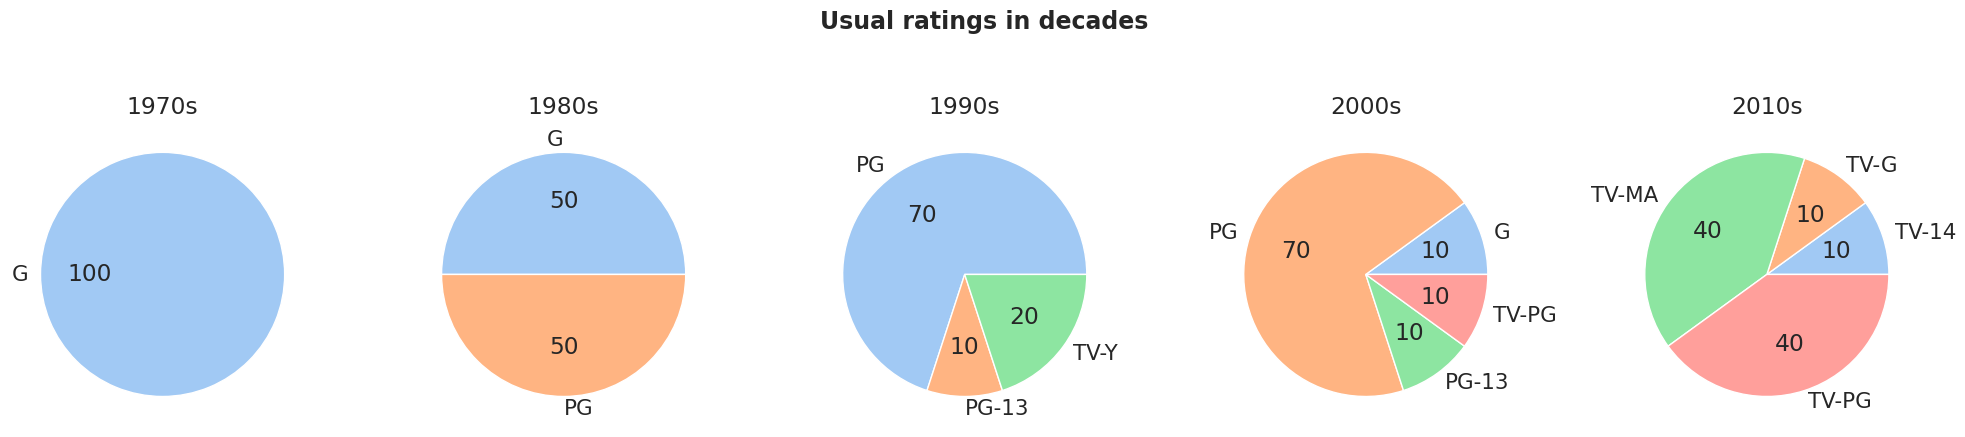

In [ ]:
rating_counts_usual = usual_final.groupby(['decade', 'rating']).size().reset_index(name = "count")
decades_usual = usual_final['decade'].unique()
figure, axes = plt.subplots(1, len(decades_usual), figsize = (4 * len(decades_usual), 5))
for i, item in enumerate(decades_usual) :
    sec_decade = rating_counts_usual[rating_counts_usual['decade'] == item]
    axes[i].pie(sec_decade['count'], labels = sec_decade['rating'], autopct="%d", colors=colors)
    axes[i].set_title(f"{item}")
plt.suptitle("Usual ratings in decades", fontsize = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()

На графике можно увидеть, что:

- В 1970–1980s нишевыми оставались **G и PG**,  
  что связано с отсутствием сегментации аудитории.  
- В 1990–2000s усиливается разнообразие — появляются **PG-13, TV-Y**,  
  форматы для конкретных возрастных групп.  
- В 2010s нишевыми становятся **TV-MA и TV-PG** —  
  жанровые сериалы и локальные проекты, рассчитанные на узкий круг зрителей.

Таким образом, нишевые шоу помогают Netflix поддерживать **контентное равновесие**:
даже если они не становятся вирусными, они повышают удержание подписчиков в отдельных сегментах.


#Популярные и нишевые жанры по декадам
Рассмотрим по той же схеме соотношения жанров среди популярных шоу по декадам, заметим, что здесь срез берется уже на топ 10 шоу, так как жанров больше чем рейтингов и так анализ получится полнее


/tmp/ipython-input-1542811869.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



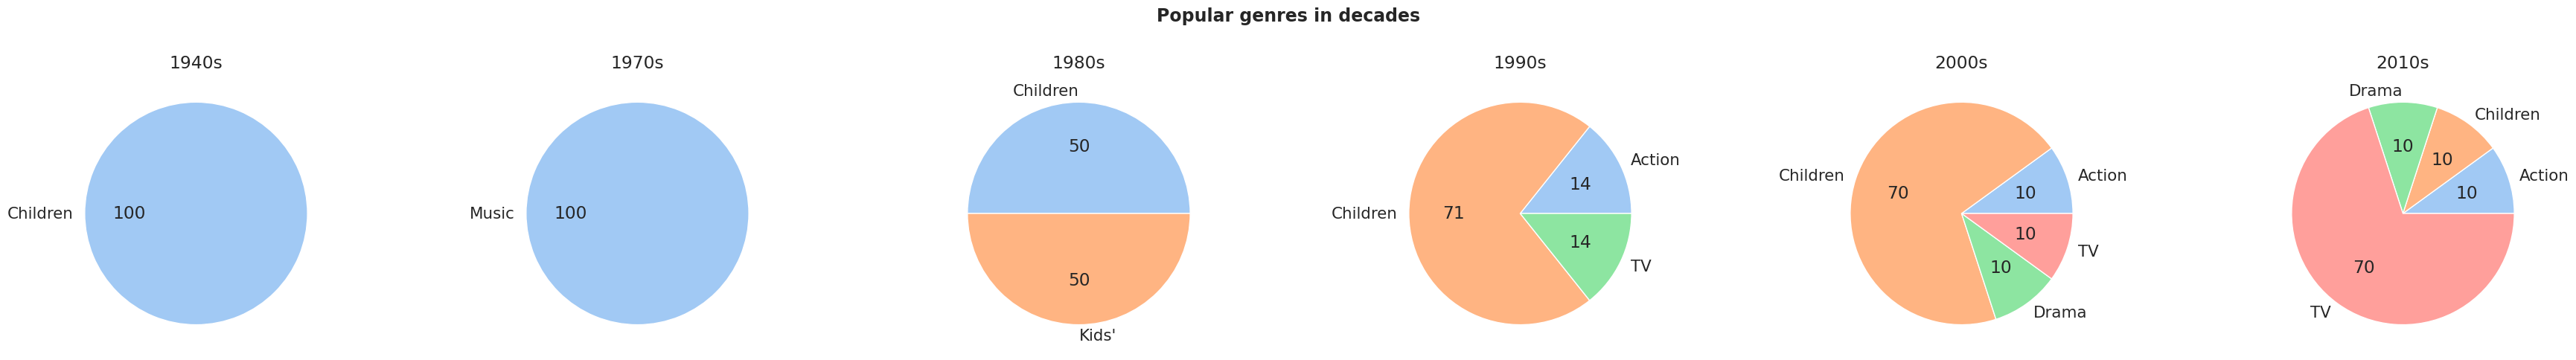

In [ ]:
data_success_decade = (data.groupby('decade')['SuccessIndex']).idxmax()
data_minlevel_success = (data.groupby('decade')['SuccessIndex']).transform('max') * 0.9
data_minlevel_success.head(3)
columns = 'title rating ratinglevel ratingdescription release_year user_rating_score user_rating_size genres content_type content_age decade SuccessIndex rating_density Balance RA_Index'.split()
popular = data.loc[data_success_decade, columns]
popular = popular.sort_values('decade')
popular_shows = data.loc[data.SuccessIndex >= data_minlevel_success, columns].sort_values(["decade", "SuccessIndex"], ascending=[True, False])
popular_final = popular_shows.groupby('decade', group_keys=False).apply(lambda x: x.head(10))
popular_final.head(3)
genres_counts_popular = popular_final.groupby(['decade', 'genres']).size().reset_index(name = "count")
decades_popular = popular_final['decade'].unique()
figure, axes = plt.subplots(1, len(decades_popular), figsize = (6 * len(decades_popular), 5))
for i, item in enumerate(decades_popular) :
    sec_decade = genres_counts_popular[genres_counts_popular['decade'] == item]
    axes[i].pie(sec_decade['count'], labels = sec_decade['genres'], autopct="%d", colors=colors)
    axes[i].set_title(f"{item}")
plt.suptitle("Popular genres in decades", fontsize = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()

В 1940–1970-х доминировали простые и понятные категории — Children и Classic, то есть контент семейного и традиционного характера. Это отражает ранний период развития массовых медиа, когда основная цель заключалась в создании «универсального» продукта для всех возрастов.

Начиная с 1980-х, начинает формироваться разнообразие: появляется категория Kids’, а в 1990-х к детскому контенту добавляются Action и TV, что указывает на рост интереса к динамичным форматам и первым сериалам, ориентированным на подростков.

2000-е стали переходным этапом — Children остаётся самой массовой категорией, но появляются Action, Drama и Classic, что отражает расширение тематики и рост взрослой аудитории.

В 2010-е жанровая структура становится максимально многослойной. Помимо Children и Action, заметен рост Crime, Drama, Romantic и International проектов. Это показывает переход Netflix от семейной модели к глобальной платформе, где основной интерес зрителей смещается к реалистичным, сюжетно насыщенным и эмоциональным историям.
Такое расширение жанров указывает на взросление аудитории и рост международного присутствия платформы.

Заметим, что Children всегда остается в срезе популярных шоу, поэтому проекты в этом жанре будут беспроигрышным вариантом. При этом в последние декады популяризуются жанры Drama и Crime, что показывает запрос зрителя на остросюжетныен шоу.

/tmp/ipython-input-824344888.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



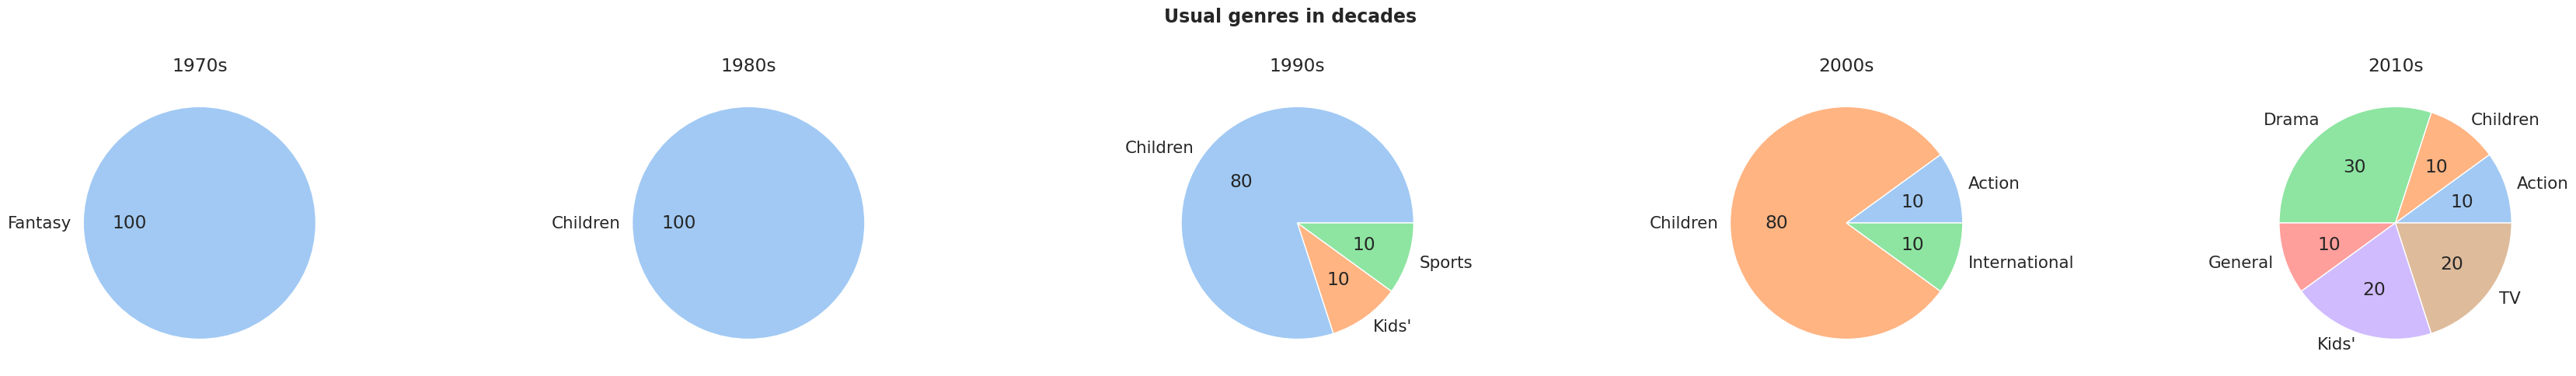

In [ ]:
usual_shows = data.loc[(data.SuccessIndex >= data_maxlevel_success) & (data.SuccessIndex <= data_minlevel_success), columns].sort_values(["decade", "SuccessIndex"], ascending=[True, False])
usual_final = usual_shows.groupby('decade', group_keys=False).apply(lambda x: x.head(10))
genres_counts_usual = usual_final.groupby(['decade', 'genres']).size().reset_index(name = "count")
decades_usual = usual_final['decade'].unique()
figure, axes = plt.subplots(1, len(decades_usual), figsize = (7 * len(decades_usual), 5))
for i, item in enumerate(decades_usual) :
    sec_decade = genres_counts_usual[genres_counts_usual['decade'] == item]
    axes[i].pie(sec_decade['count'], labels = sec_decade['genres'], autopct="%d", colors=colors)
    axes[i].set_title(f"{item}")
plt.suptitle("Usual genres in decades", fontsize = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()

В 1970–1980-х доминируют жанры Fantasy и Children — они представляют классический формат семейного и сказочного контента, характерный для телевидения тех лет. (Заметим, что выводы по рейтингам говорят о том же)

В 1990-х структура слегка меняется: всё ещё лидирует Children (80%), но появляются Sports и Kids’. Это отражает попытку индустрии разнообразить детские форматы, добавив динамику и спортвные шоу.

В 2000-х жанровое разнообразие растёт: к детским шоу добавляются Action и International, что указывает на начало интернационализации Netflix и появление контента для более широкой аудитории.

К 2010-м изменения становятся особенно заметны — Drama и TV занимают уже большую часть, вытесняя детские форматы. Появление категорий General и International показывает, что нишевые жанры становятся стабильной опорой платформы: такие сериалы не обязательно взрывают рейтинги, но формируют ядро постоянных зрителей.

Таким образом, можно сказать, что типичный контент Netflix постепенно взрослеет, отражая не только смену поколений зрителей, но и общую стратегию платформы — от универсальности к жанровой глубине и разнообразию.

Здесь прослеживают подобные выводы, также как и в срезе популярных жанров. Однако, стоит заметить, что доминирующих в 2010х детективов здесь нет, из чего следует: снимать их стоит только при наличии особых факторов, отличающих проект от других на рынке (например, звездный актерский состав или глубокий сценарий).

#Итоговые выводы по проекту<br><br>
Проведённый анализ данных Netflix позволил проследить, как менялись предпочтения аудитории и какие факторы влияют на успех контента на платформе.
 Мы изучили пользовательские оценки, интенсивность вовлечённости, возрастные рейтинги и создали несколько гибридных метрик — SuccessIndex, RA_Index, rating_density и Balance, — которые помогли выявить различные закономерности.
В целом результаты показали, что структура интереса к контенту постепенно смещается от универсальных и семейных шоу к более взрослым, сюжетно сложным и жанрово разнообразным проектам. Если в ранние десятилетия (1940–1980-е) основу составляли фильмы и мультфильмы с рейтингом G/PG, то с 2000-х уверенно растёт доля контента TV-14 и TV-MA, что отражает «взросление» аудитории.<br><br>

###Основные наблюдения и интерпретации<br><br>
1) Рост интереса к зрелому контенту (TV-MA, TV-14)
Со временем платформа всё больше ориентируется на взрослую аудиторию. Сегодня преобладают проекты с рейтингами TV-MA и TV-14 — это отражает мировой сдвиг от семейных шоу к более серьёзным и реалистичным историям. Первые поколения пользователей стриминговых сервисов (миллениалы и Gen X) повзрослели и теперь хотят контента с глубиной и эмоциями. Одновременно снизилась табуированность тем насилия, откровенности и жёсткого юмора — то, что раньше не допускалось на телевидении, стало нормой. Стриминговые платформы не ограничены цензурой, поэтому свободно выпускают смелые проекты. Важную роль сыграли кризисы, пандемия и общая нестабильность: усилился запрос на честные истории, моральные дилеммы и «живые» эмоции — зрители устали от предсказуемых сюжетов и хотят действительно глубоких историй.
Это изменило форматы и жанры. «Взрослые» сериалы стали флагманами эпохи стриминга: сложные сюжеты с антигероями, мрачные драмы, документальные расследования. Популярны криминальные истории, психологические триллеры и сатирические комедии — жанры, требующие жизненного контекста. Планка качества выросла: зрители избирательнее, и не каждый проект с рейтингом MA/14 оказывается успешным. Метрики подтверждают: контент 18+ показывает самую высокую вовлечённость. RA_Index демонстрирует, что именно TV-MA эффективнее всего превращают интерес аудитории в стабильный просмотр; новые релизы получают отклик быстро — чем свежее контент, тем активнее он оценивается. Ставка на взрослый сегмент оправдана: такие проекты приносят и внимание, и высокие пользовательские оценки.<br><br>
Рекомендации (adult-контент):
- Продолжать инвестировать в качественный взрослый контент с высокой планкой сюжета и продакшна; расширять жанры (взрослая анимация, социальная сатира, реалистичные истории о работе и семье), чтобы избежать однообразия.
- Помнить про высокую конкуренцию: тщательно проверять идеи и не полагаться на шок-фактор; выигрывают проекты с хорошо прописанными персонажами и сильной драматургией.
- Активнее использовать аналитику (SuccessIndex, RA_Index) для выявления рабочих приёмов у лидеров TV-MA/TV-14 и масштабировать находки.<br><br>

2) Падение интереса к семейному контенту (G, TV-Y7)
Интерес к универсальному семейному контенту — детским и общесемейным проектам G/TV-Y7 — постепенно снижается. Это видно по низкой вовлечённости: зрители реже оценивают такие шоу, а rating_density стабильно минимальна. Причины понятны: аудитория стримингов взрослеет; формат «семейного просмотра» ушёл — у каждого свой экран и свой выбор; детская аудитория сместилась в YouTube и мобильные приложения и привыкла к короткому, динамичному контенту; универсальные шоу «для всех» всё чаще оказываются «ни для кого». В итоге детские проекты стали нишевыми: их смотрят в основном сами дети или узкие фан-группы; контент для детей быстро устаревает; сегмент страдает от нехватки новых идей — многие студии опираются на старые формулы.
 При этом контент для детей по-прежнему важен: он даёт много часов просмотра, просто реже попадает в рейтинги и обсуждения.<br><br>
Рекомендации (семейный сегмент):
- Не отказываться, а обновить сегмент: ставка на качество и истории, интересные и детям, и взрослым (кросс-поколенческий подход).
- Экспериментировать с форматами: короткие серии, интерактивные элементы, образовательные темы; опираться на опыт проектов с высоким Balance.
- Строить продвижение через родителей (ценность совместного просмотра), развивать Kids Profiles и родконтроль.
- Избегать шаблонности: говорить с детьми «на равных», без мрачности; даже в G/PG можно поднимать темы дружбы, экологии, саморазвития по-новому.<br><br>

3) Важность нишевых рейтингов PG и TV-PG
Несмотря на доминирование крайностей (детских и взрослых шоу), промежуточные категории PG/TV-PG сохраняют важную роль. Таких проектов меньше, но среди них нередко встречаются открытия на уровне лидеров TV-14/TV-MA. Это объясняется запросом на лёгкий, но не детский контент: подростковые истории, приключения, фэнтези, комедии. Взрослые ностальгируют по классике 80–90-х, молодёжь, уставшая от стресса, чаще выбирает feel-good. Эти сериалы становятся «точкой пересечения» поколений. TikTok и соцсети вдохнули жизнь в подростковые шоу: клипы делают их вирусными и приводят новую аудиторию. Жанры «для подростков» снова на пике: школьная драма, ромком, подростковое фэнтези. Наш анализ показывает: в TV-MA/TV-14/TV-PG есть и провалы, и суперхиты; в PG встречаются «тихие лидеры» с высоким Balance, которые удерживают зрителей без шок-эффектов. Иногда из этой ниши вырастают глобальные хиты.<br><br>
Рекомендации (PG/TV-PG):
- Развивать PG/TV-PG как пространство экспериментов: подростковое фэнтези, семейные комедии, лёгкие приключения.
- Изучать успешные кейсы: найти общие черты у топ-3 TV-PG по SuccessIndex в каждой эпохе (герои, атмосфера, музыка/соцсети) и использовать их в новых проектах.
- Чётко позиционировать PG-контент: «для всей семьи, но со смыслом», активнее продвигать в TikTok/Instagram.
- Избегать снисходительного тона: говорить с подростками на равных — о дружбе, самоопределении и первых чувствах — без морализаторства.<br><br>

###Роль метрик и устойчивые стратегические направления<br><br>
- Корреляционный анализ (heatmap): метрики вовлечённости (rating_density, RA_Index) логично взаимосвязаны — обе измеряют «скорость отклика». Balance более независим и показывает «внутренних лидеров»/«аутсайдеров» в каждой возрастной категории.
- 3D-графики по декадам/рейтингам: высокий средний user_rating_score у TV-MA в 2000–2010-х подтверждает доминирование зрелых драм и триллеров; G/TV-Y7/PG теряют позиции.
- RA_Index: быстрее всего «окупаются» проекты TV-14/TV-MA — они быстрее набирают просмотры и удерживают интерес.
- Balance: помогает выявлять аномалии и формулы успеха (например, PG-проекты 1990-х с Balance > 2).<br><br>
- Структура по SuccessIndex:
  - популярные — TV-MA/TV-14 (массовые хиты, высокий RA);
  - нишевые — PG/TV-PG (средняя вовлечённость, стабильная аудитория);
  - неудачные — G/TV-Y7 (детский и устаревающий контент).<br><br>
###Стратегические направления:
-  Взросление аудитории: основные просмотры и высокие оценки — у TV-MA/TV-14 (18–35 лет).
- Сужение ниши детского контента: много тайтлов, но низкая вовлечённость; часть аудитории уходит в YouTube/Disney+.
-  Рост значимости «нишевых» форматов: PG/TV-PG держат базу удержания, дают пространство для жанровых экспериментов.
-  Инвестиционная эффективность: высокие RA и rating_density у свежих проектов показывают умение быстро продвигать перспективные релизы.<br><br>

###Рекомендации
Для Netflix:
-  Развивать взрослую линейку (TV-MA/TV-14), усиливая драмы/триллеры с сильной эмоцией.
- Перезагрузить детский сегмент (G/TV-Y7) за счёт качества и актуальных форматов (короткие/интерактивные), а не количества.
- Использовать Balance для внутреннего аудита категорий и поиска «внутренних чемпионов».
- Опираться на RA_Index и rating_density при планировании маркетинга (скорость отклика).
- Поддерживать устойчивый «второй эшелон» (PG/TV-PG) как основу удержания и международного роста.<br>

Для продюсеров и сценаристов:
- Думать не только жанром, но и скоростью вовлечения (rating_density): чем быстрее собираются отзывы, тем выше шансы на успех.
- Использовать SuccessIndex как индикатор баланса качества и охвата: шоу может быть не идеальным по оценке, но успешным при широком охвате.
- Изучать проекты с высоким Balance внутри своей категории — это «точки роста» и примеры удачной комбинации темы, формы и подачи.<br><br>

###Итог
Успех контента определяется не только оценками, но и тем, насколько быстро и активно аудитория реагирует. Зрелые форматы (TV-MA/TV-14) дают максимальную отдачу, а PG/TV-PG обеспечивают стабильность и удержание. Платформа движется к умной дифференциации, где каждая категория выполняет свою роль — от драйвера роста до основы долгосрочной лояльности.<br><br>

